In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#write your understanding

In [3]:
import struct, numpy as np

def load_mnist_images(path):
    with open(path, 'rb') as f:
        _, num, rows, cols = struct.unpack(">IIII", f.read(16))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(num, rows, cols)

def load_mnist_labels(path):
    with open(path, 'rb') as f:
        _, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels
def load_mnist_test(path):
    with open(path, 'rb') as f:
        _, num, rows, cols = struct.unpack(">IIII", f.read(16))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(num, rows, cols)

def load_mnist_test_labels(path):
    with open(path, 'rb') as f:
        _, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

x_train = load_mnist_images('/content/drive/MyDrive/train-images.idx3-ubyte')
y_train = load_mnist_labels('/content/drive/MyDrive/train-labels.idx1-ubyte')
x_test = load_mnist_test('/content/drive/MyDrive/t10k-images.idx3-ubyte')
y_test = load_mnist_test_labels('/content/drive/MyDrive/t10k-labels.idx1-ubyte')

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
#we can view the image what number in-it.
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [6]:
# The number that we see in the x_train which is comes from y_test(dependent value)
y_train[0]

np.uint8(5)

In [7]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [8]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [9]:
y_test[0]

np.uint8(7)

In [10]:
#data normilazition(scaling)

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
x_train[0].min()

np.float64(0.0)

In [13]:
x_train[0].max()

np.float64(1.0)

In [14]:
#check how many unique values are there and class balance!!
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

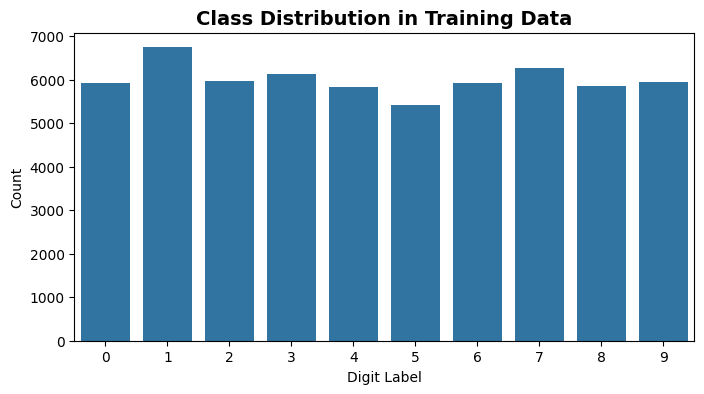

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Data", fontsize=14, fontweight='bold')
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

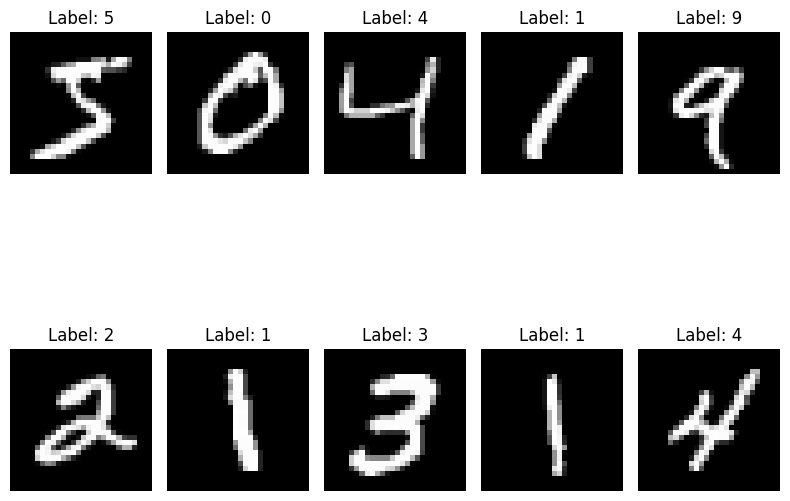

In [16]:
# visualization
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [18]:
model = Sequential([Conv2D(32, kernel_size=(3,3),activation='relu',input_shape = (28,28,1)),
                    MaxPooling2D(pool_size=(2,2)),

                    Conv2D(64, kernel_size=(3,3),activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),

                    Flatten(),

                    Dense(128, activation = 'relu'),
                    Dense(10, activation = "softmax")

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile the CNN model

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [32]:
history = model.fit(x_train,y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)
print("History keys:", history.history.keys())

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9900 - val_loss: 0.0554
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9990 - loss: 0.0029 - val_accuracy: 0.9885 - val_loss: 0.0578
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.9986 - loss: 0.0039 - val_accuracy: 0.9913 - val_loss: 0.0523
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 106ms/step - accuracy: 0.9990 - loss: 0.0023 - val_accuracy: 0.9908 - val_loss: 0.0575
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9999 - loss: 6.0555e-04 - val_accuracy: 0.9928 - val_loss: 0.0524
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - accuracy: 0.9995 - loss: 0.0013 - val_accuracy: 0.9912 - val_loss: 0.0526
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 90ms/step - accuracy: 0.9991 - loss: 0.0025 - val_accuracy: 0.9907 - val_loss: 0.0585
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.9995 - loss: 0.00

In [38]:
test_loss,test_accuracy, = model.evaluate(x_test,y_test)

print(f'test accuracy : {test_accuracy:.4f}')
print(f'test loss : {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9891 - loss: 0.0493
test accuracy : 0.9916
test loss : 0.0399


In [39]:
prediction = model.predict(x_test)
y_predict = np.argmax(prediction,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


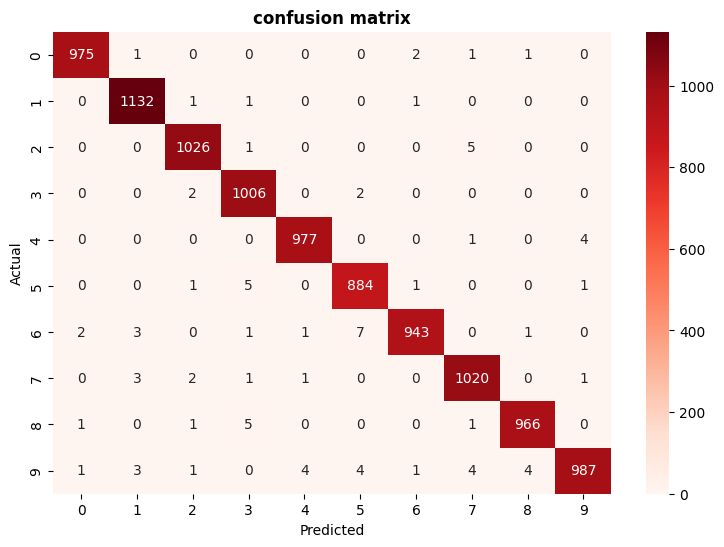

In [87]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
cm = confusion_matrix(y_test,y_predict)
report = classification_report(y_test,y_predict,digits=4)

plt.figure(figsize=(9,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.title('confusion matrix', weight='bold')
plt.xlabel('Predicted',fontsize=10)
plt.ylabel('Actual',fontsize=10)
plt.show()


In [88]:
print(report)

              precision    recall  f1-score   support

           0     0.9959    0.9949    0.9954       980
           1     0.9912    0.9974    0.9943      1135
           2     0.9923    0.9942    0.9932      1032
           3     0.9863    0.9960    0.9911      1010
           4     0.9939    0.9949    0.9944       982
           5     0.9855    0.9910    0.9883       892
           6     0.9947    0.9843    0.9895       958
           7     0.9884    0.9922    0.9903      1028
           8     0.9938    0.9918    0.9928       974
           9     0.9940    0.9782    0.9860      1009

    accuracy                         0.9916     10000
   macro avg     0.9916    0.9915    0.9915     10000
weighted avg     0.9916    0.9916    0.9916     10000



In [89]:
# Supervised Classification Models: Decision Tree & Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

In [90]:
DT = DecisionTreeClassifier(criterion='entropy',random_state=42)
DT.fit(x_train_flat,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [92]:
DT_PREDICT = DT.predict(x_test_flat)

In [106]:
print('Accuracy :', accuracy_score(y_test,DT_PREDICT))
print('classification report :\n', classification_report(y_test,DT_PREDICT))
print('confusion matrix :\n', confusion_matrix(y_test,DT_PREDICT))

Accuracy : 0.8857
classification report :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       980
           1       0.96      0.97      0.96      1135
           2       0.87      0.88      0.87      1032
           3       0.86      0.84      0.85      1010
           4       0.88      0.88      0.88       982
           5       0.84      0.84      0.84       892
           6       0.89      0.90      0.90       958
           7       0.92      0.90      0.91      1028
           8       0.84      0.84      0.84       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000

confusion matrix :
 [[ 910    1   10    5    4   18   16    4    6    6]
 [   0 1096    9    3    2    7    3    2   10    3]
 [   7    5  911   21   11    9   19   16   28    5]
 [   6    8   28  8

In [83]:
RF = RandomForestClassifier(n_estimators=1000,random_state=42)
RF.fit(x_train_flat,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [103]:
RF_PREDICT = RF.predict(x_test_flat)

In [105]:
print('Accuracy :', accuracy_score(y_test,RF_PREDICT))
print('classification report :\n', classification_report(y_test,RF_PREDICT))
print('confusion matrix :\n', confusion_matrix(y_test,RF_PREDICT))

Accuracy : 0.9725
classification report :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

confusion matrix :
 [[ 969    0    0    0    0    2    3    1    4    1]
 [   0 1124    2    3    0    1    3    0    1    1]
 [   6    0 1001    4    3    0    4    8    6    0]
 [   0    0    8  9

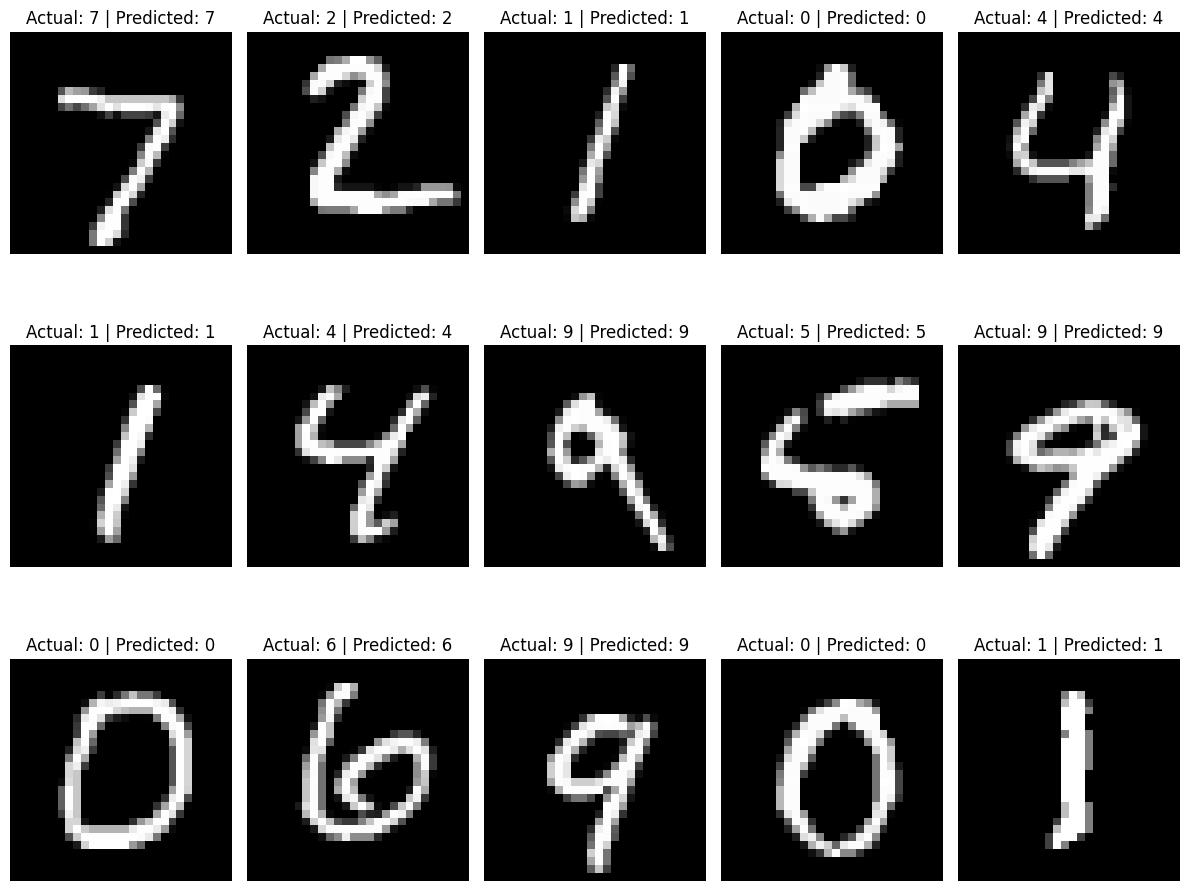

In [71]:
plt.figure(figsize=(12,10))
for i in range(15):
    plt.subplot(3,5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test[i]} | Predicted: {y_predict[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [72]:
model.save("mnist_cnn_model.h5")